In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.api as sm

## Question 1
#### Part(a)

In [3]:
df = pd.read_csv('data/Auto.csv', na_values='?') #actually there is no missing values in the dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
df.dropna(inplace=True)

#### Part (b)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x164D4970>,
      dtype=object)

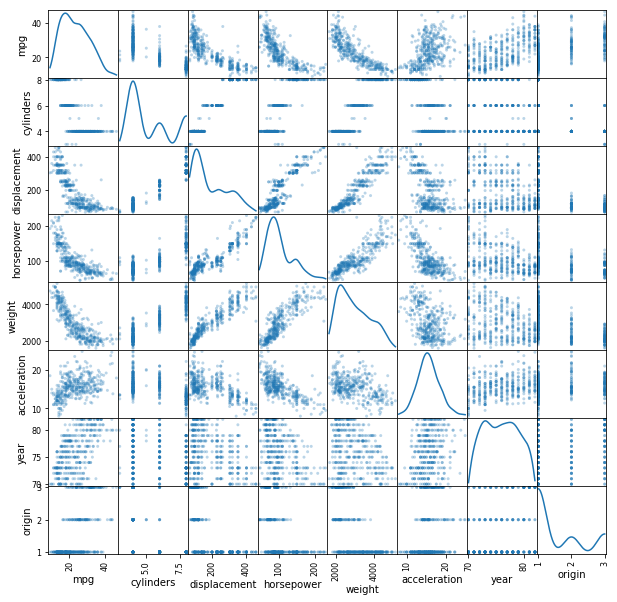

In [55]:
scatter_matrix(df, alpha=0.3, figsize=(10, 10),diagonal='kde')

#### Part(c)

In [56]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


#### Part(d)

In [57]:
Y = df.mpg
X = df[['cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'year', 'origin']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 13 Feb 2019   Prob (F-statistic):          2.04e-139
Time:                        12:11:34   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

$\beta_0$, $\beta_2$, $\beta_4$, $\beta_6$, $\beta_7$  are statistically significant at the 1% level.  
$\beta_1$, $\beta_3$, and $\beta_5$ are not statistically significant at the 10% level.  
Holding all other variables constant, one more year of vehicle year will increase miles per gallon by 0.7508 on average

#### Part(e)

The three variables most likely to be non-linearly related with $mpg_i$ are $displacement_i$, $horsepower_i$, $weight_i$

In [60]:
df['displ2'] = df.displacement*df.displacement
df['hp2'] = df.horsepower*df.horsepower
df['weight2'] = df.weight*df.weight
df['accel2'] = df.acceleration*df.acceleration
Y = df.mpg
X2 = df[['cylinders', 'displacement','displ2', 'horsepower','hp2', 'weight', 'weight2', 'acceleration', 'accel2', 'year', 'origin']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y,X2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Wed, 13 Feb 2019   Prob (F-statistic):          1.75e-160
Time:                        12:19:44   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.1084      6.696      3.003   

In [105]:
from statsmodels.iolib.summary2 import summary_col

info_dict={'R-squared' : lambda x: "{:.2f}".format(x.rsquared),
           'No. observations' : lambda x: "{0:d}".format(int(x.nobs))}

results_table = summary_col(results=[results,results2],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2'],
                            info_dict=info_dict,
                            regressor_order=['cylinders', 'displacement','displ2', 'horsepower','hp2', 'weight', 'weight2', 'acceleration', 'accel2', 'year', 'origin'])

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)

     Table 2 - OLS Regressions
                  Model 1  Model 2 
-----------------------------------
cylinders        -0.49     0.25    
                 (0.32)    (0.33)  
displacement     0.02***   -0.02   
                 (0.01)    (0.02)  
displ2                     0.00    
                           (0.00)  
horsepower       -0.02     -0.16***
                 (0.01)    (0.04)  
hp2                        0.00*** 
                           (0.00)  
weight           -0.01***  -0.01***
                 (0.00)    (0.00)  
weight2                    0.00*** 
                           (0.00)  
acceleration     0.08      -2.09***
                 (0.10)    (0.56)  
accel2                     0.06*** 
                           (0.02)  
year             0.75***   0.78*** 
                 (0.05)    (0.04)  
origin           1.43***   0.61**  
                 (0.28)    (0.26)  
const            -17.22*** 20.11***
                 (4.64)    (6.70)  
R-squared        0.82      0.87  

The adjusted R-squared from part (d) is 0.818. It becomes 0.866 in part (e).  
The parameters on displacement and its squared term changes from significant at 1% level to nonsignificant at 10% level.  
The parameter on cylinders remains unsignificant at 10% level.

#### Part(f)

In [98]:
#results2.predict(np.array([20.1084, 6, 200, 200**2, 100, 100**2, 3100, 3100**2, 15.1, 15.1**2, 99, 1]))
Xnew = [1, 6, 200, 200**2, 100, 100**2, 3100, 3100**2, 15.1, 15.1**2, 99, 1]
#Xnew = sm.add_constant(Xnew)
results2.predict(exog = Xnew)[0]

38.73211109752114

## Question2

#### (a)
| Obs. | X1 X2 X3 | Y | Euclidean distance from X1=0, X2=0, X3 = 0|
|-------|----------|----|---------------------------------------------|
| 1 | 0 3 0 | Red | 3 |
| 2 | 2 0 0 | Red | 2 |
| 3 | 0 1 3 | Red | $\sqrt 10$ |
| 4 | 0 1 2 | Green | $\sqrt 5$ |
| 5 | -1 0 1 | Green | $\sqrt 2$
| 6 | 1 1 1 | Red | $\sqrt 3$

#### (b)
With K = 1, the prediction is Green, because the closest observation to $(X_1=0, X_2=0, X_3=0)$ is No.5, and it's green.

#### (c)
The three closes observation to $(X_1=0, X_2=0, X_3=0)$ are No. 2, 5, and 6. No.2 and No.6 are red. Therefore our prediction is Red.

#### (d)

The best value for K should be larger. As the decision boundary is highly nonlinear, it is capturing too much noise in the data. We could better approximate the optimal decision boundary by increasing K.

#### (e)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
#0 for red, 1 for green
X = [[0,3,0],[2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]]
y = [0,0,0,1,1,0]
neigh = KNeighborsClassifier(n_neighbors=2, weights='distance')
cls = neigh.fit(X, y)
cls.predict([[1,1,1]])[0]

0

## Question3

In [117]:
df['mpg_high'] = 0
df.mpg_high[df.mpg>df.mpg.median()] = 1

c:\users\nancy\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Part(a)

In [119]:
Y = df.mpg_high
model3 = sm.Logit(Y, X)
results3 = model3.fit()
print(results3.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Wed, 13 Feb 2019   Pseudo R-squ.:                  0.7101
Time:                        13:15:08   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

Regressors whose parameters are significant at 5% level are $intercept_i$, $wgt_i$, $yr_i$

#### Part(b)

In [143]:
from sklearn.model_selection import train_test_split
Y = df.mpg_high
X = df[['cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'year', 'origin']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state=10)

#### Part(c)

In [163]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=10, solver='lbfgs',multi_class='multinomial', max_iter=1000).fit(X_train, y_train)
print(clf.intercept_, clf.coef_[0])

[-0.10026775] [-0.65778453  0.00857665 -0.01765525 -0.00257148 -0.1095927   0.1673492
 -0.04700394]


#### Part(d)

In [167]:
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
score

0.8724489795918368

In [169]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[86 12]
 [13 85]]


In [173]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test,target_names=['Low mpg', 'High mpg']))

              precision    recall  f1-score   support

     Low mpg       0.87      0.88      0.87        98
    High mpg       0.88      0.87      0.87        98

   micro avg       0.87      0.87      0.87       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.87      0.87      0.87       196

